### Importation des librairies

In [1]:
%%capture capt
!pip install lifelines
!pip install tqdm
!pip install numpy==1.22
from tqdm import tqdm
import numpy as np
import pandas as pd
from lifelines.statistics import proportional_hazard_test
from lifelines.statistics import logrank_test
from lifelines import KaplanMeierFitter
from matplotlib import pyplot as plt
from lifelines import CoxPHFitter
from sklearn.model_selection import train_test_split
import statsmodels.stats.diagnostic as diag
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

### Base cluster unsupervised

In [2]:
profil_patient=pd.read_csv("../data/profil_patient_cluster.csv")
profil_patient['CHOC']=profil_patient['CHOC'].astype(int)
profil_patient['y_nais']=2016-profil_patient['y_nais']
#Nb_jours_moyen=Nombre de jours hospitalisé / Nombre de séjours
#Moyenne empirique du nombre de jours hospitalisé
profil_patient['Nb_jours_moyen']=profil_patient['Nb_jours_sej']/profil_patient['Nb_hospit']
profil_patient.head()

,CODE_PATIENT,date_h0,y_nais,BEN_RES_DPT,BEN_SEX_COD,dte_deces,Mort,Nb_survie,Nb_hospit,CHOC,...,cluster13,cluster14,cluster15,cluster16,cluster17,cluster18,cluster19,cluster20,p_soins,Nb_jours_moyen
0,P0,2011-11-22,67,11,1,NaN,False,2596,9,0,...,0,0,0,0,0,0,0,0,"05K051,05M042,05M16T,05M09T,05M092,05C191,05M2...",2.555556
1,P6,2013-12-05,87,14,2,2015-03,True,456,8,0,...,0,0,0,0,1,0,0,0,"02C05J,02C05J,05M093,04M132,05C222,23M103,04M0...",6.375000
2,P8,2015-07-02,49,54,2,2015-08,True,41,3,1,...,0,0,0,0,0,1,0,0,"11M041,06C194",14.333333
3,P13,2011-05-19,57,974,1,NaN,False,2783,2,0,...,0,0,0,0,0,0,0,0,"05M04T,05K051",1.500000
4,P16,2010-03-18,69,76,1,NaN,False,3210,9,0,...,0,0,0,0,0,1,0,0,"08C11V,23M15Z,05K102,05M08T,05K102,05C191,23M1...",3.111111


### Test Log-Rank

#### Entre clusters non supervisés

Text(0.5, 1.0, 'p-valeur du test de nullité log-rank inter-clusters')

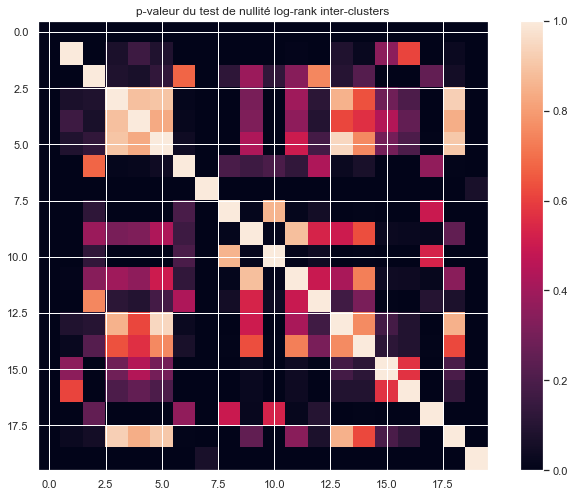

In [3]:
Matrice=np.zeros((20,20))
for i in range (1,20):
    for j in range (1,20):
        results = logrank_test(profil_patient['Nb_survie'][profil_patient['cluster' + str(i)]==1], profil_patient['Nb_survie'][profil_patient['cluster' + str(j)]==1], event_observed_A=profil_patient['Mort'][profil_patient['cluster' + str(i)]==1], event_observed_B=profil_patient['Mort'][profil_patient['cluster' + str(j)]==1])
        Matrice[i,j]=results.p_value
plt.imshow(Matrice)
plt.colorbar()
plt.title("p-valeur du test de nullité log-rank inter-clusters")

Text(0.5, 1.0, 'p-valeur du test de nullité log-rank inter-clusters')

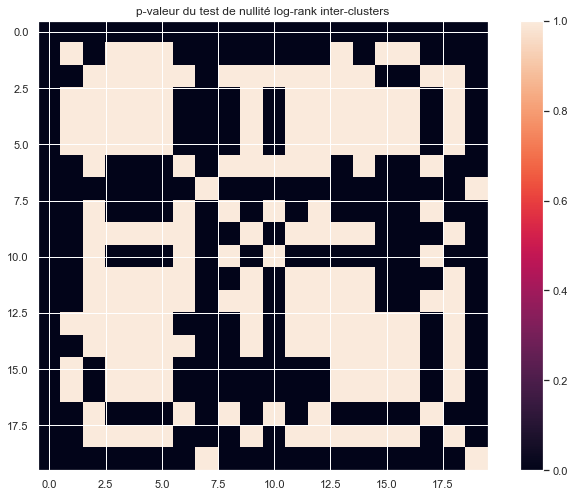

In [4]:
Matrice_seuil=1 *(Matrice>0.05)
plt.imshow(Matrice_seuil)
plt.colorbar()
plt.title("p-valeur du test de nullité log-rank inter-clusters")

#### Choc ou pas choc

p-valeur CHOC/PAS CHOC =
1.0571089917141666e-10


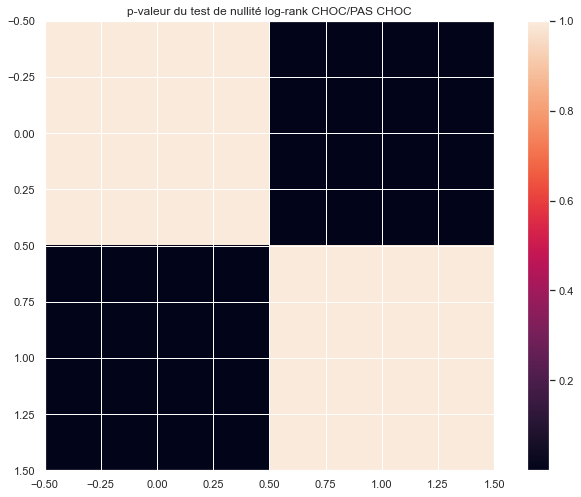

In [5]:
Matrice=np.zeros((2,2))
for i in range (0,2):
    for j in range (0,2):
        cluster_i=i
        cluster_j=j
        results = logrank_test(profil_patient['Nb_survie'][profil_patient['CHOC']==cluster_i], profil_patient['Nb_survie'][profil_patient['CHOC']==cluster_j], event_observed_A=profil_patient['Mort'][profil_patient['CHOC']==cluster_i], event_observed_B=profil_patient['Mort'][profil_patient['CHOC']==cluster_j])
        Matrice[i,j]=results.p_value
plt.imshow(Matrice)
plt.colorbar()
plt.title("p-valeur du test de nullité log-rank CHOC/PAS CHOC")
print("p-valeur CHOC/PAS CHOC =")
print(logrank_test(profil_patient['Nb_survie'][profil_patient['CHOC']==0], profil_patient['Nb_survie'][profil_patient['CHOC']==1], event_observed_A=profil_patient['Mort'][profil_patient['CHOC']==0], event_observed_B=profil_patient['Mort'][profil_patient['CHOC']==1]).p_value)

Text(0.5, 1.0, 'p-valeur du test de nullité log-rank CHOC/PAS CHOC')

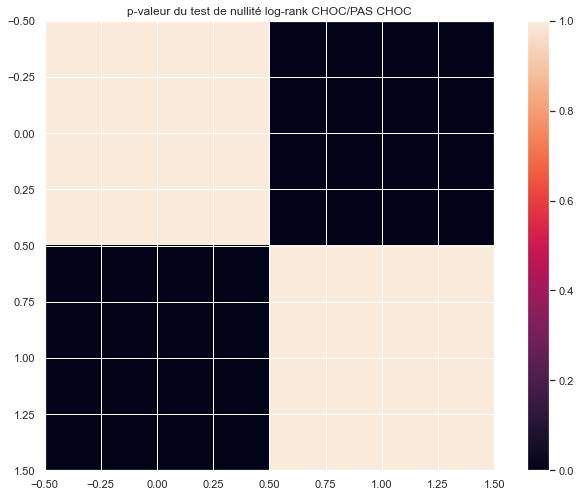

In [6]:
Matrice_seuil=1 *(Matrice>0.05)
plt.imshow(Matrice_seuil)
plt.colorbar()
plt.title("p-valeur du test de nullité log-rank CHOC/PAS CHOC")

#### Homme ou femme

p-valeur HOMME/FEMME =
0.004273345157189771


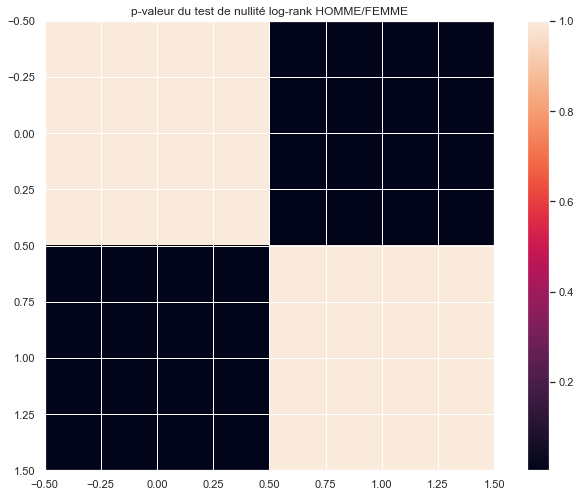

In [7]:
Matrice=np.zeros((2,2))
for i in range (0,2):
    for j in range (0,2):
        cluster_i=i+1
        cluster_j=j+1
        results = logrank_test(profil_patient['Nb_survie'][profil_patient['BEN_SEX_COD']==cluster_i], profil_patient['Nb_survie'][profil_patient['BEN_SEX_COD']==cluster_j], event_observed_A=profil_patient['Mort'][profil_patient['BEN_SEX_COD']==cluster_i], event_observed_B=profil_patient['Mort'][profil_patient['BEN_SEX_COD']==cluster_j])
        Matrice[i,j]=results.p_value
plt.imshow(Matrice)
plt.colorbar()
plt.title("p-valeur du test de nullité log-rank HOMME/FEMME")
print("p-valeur HOMME/FEMME =")
print(logrank_test(profil_patient['Nb_survie'][profil_patient['BEN_SEX_COD']==1], profil_patient['Nb_survie'][profil_patient['BEN_SEX_COD']==2], event_observed_A=profil_patient['Mort'][profil_patient['BEN_SEX_COD']==1], event_observed_B=profil_patient['Mort'][profil_patient['BEN_SEX_COD']==2]).p_value)

Text(0.5, 1.0, 'p-valeur du test de nullité log-rank CHOC/PAS CHOC')

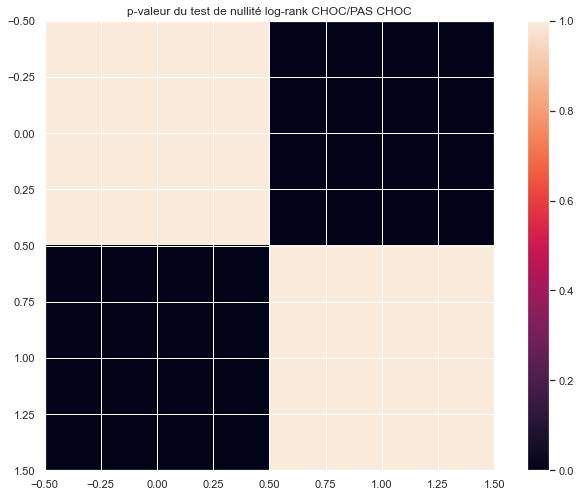

In [8]:
Matrice_seuil=1 *(Matrice>0.05)
plt.imshow(Matrice_seuil)
plt.colorbar()
plt.title("p-valeur du test de nullité log-rank CHOC/PAS CHOC")

### Test COX en extrayant les patients pour chaque cluster

In [9]:
profil_patient=pd.read_csv("../data/profil_patient_cluster.csv")
profil_patient['CHOC']=profil_patient['CHOC'].astype(int)
profil_patient['y_nais']=2016-profil_patient['y_nais']
#Nb_jours_moyen=Nombre de jours hospitalisé / Nombre de séjours
#Moyenne empirique du nombre de jours hospitalisé
profil_patient['Nb_jours_moyen']=profil_patient['Nb_jours_sej']/profil_patient['Nb_hospit']
profil_patient=profil_patient.drop(['CODE_PATIENT', 'date_h0', 'BEN_RES_DPT','dte_deces', 'cat_age', 'cat_nb_hospit','cat_nb_jours_sej', 'p_soins', 'Nb_hospit', 'Nb_jours_sej'], axis=1)
profil_patient.head()

,y_nais,BEN_SEX_COD,Mort,Nb_survie,CHOC,cluster1,cluster2,cluster3,cluster4,cluster5,...,cluster12,cluster13,cluster14,cluster15,cluster16,cluster17,cluster18,cluster19,cluster20,Nb_jours_moyen
0,67,1,False,2596,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.555556
1,87,2,True,456,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,6.375000
2,49,2,True,41,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,14.333333
3,57,1,False,2783,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.500000
4,69,1,False,3210,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3.111111


In [10]:
data_train, data_test = train_test_split(profil_patient, 
                                                    test_size=0.2, 
                                                    random_state=33)


In [11]:
data_train.head()

,y_nais,BEN_SEX_COD,Mort,Nb_survie,CHOC,cluster1,cluster2,cluster3,cluster4,cluster5,...,cluster12,cluster13,cluster14,cluster15,cluster16,cluster17,cluster18,cluster19,cluster20,Nb_jours_moyen
907,54,1,True,226,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,8.454545
8286,67,1,False,1509,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.000000
1276,88,2,True,354,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,5.800000
5022,95,2,True,763,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.142857
401,53,1,True,236,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,9.818182


In [12]:
def extract_cluster_i(i):
    data_train_cluster=data_train[data_train['cluster' + str(i)]==1]
    for j in range(1,21):
        data_train_cluster=data_train_cluster.drop(['cluster' + str(j)], axis=1)
    return data_train_cluster

In [13]:
data_train_cluster= extract_cluster_i(1)
data_train_cluster

,y_nais,BEN_SEX_COD,Mort,Nb_survie,CHOC,Nb_jours_moyen
8286,67,1,False,1509,0,1.000000
3350,79,1,False,3274,0,1.285714
3982,93,2,True,12,0,7.000000
1627,89,1,True,1046,0,5.000000
4181,95,1,True,27,0,27.000000
...,...,...,...,...,...,...
5548,81,1,False,2292,0,5.000000
8753,83,1,True,681,0,6.818182
9419,83,2,True,2274,0,1.333333
1898,92,2,True,477,0,6.666667


In [14]:
%%capture capt
data_train_cluster= extract_cluster_i(1)
cph = CoxPHFitter()
cph.fit(data_train_cluster, duration_col='Nb_survie', event_col='Mort')
cph.print_summary()
#Use Lifelines to calculate the variance scaled Schoenfeld residuals for all regression variables in one go:
scaled_schoenfeld_residuals = cph.compute_residuals(training_dataframe=data_train_cluster, kind='scaled_schoenfeld')
#print(scaled_schoenfeld_residuals)
Variables=['y_nais','BEN_SEX_COD','CHOC','Nb_jours_moyen']
for variable in Variables:
    print('Pour la variable' + str(variable) + ':')
    #Let's plot the residuals for AGE against time:
    #plt.plot(scaled_schoenfeld_residuals.index[:500], scaled_schoenfeld_residuals[variable][:500])
    #plt.show()
    #Run the Ljung-Box test to test for auto-correlation in residuals up to lag 40
    result=diag.acorr_ljungbox(x=scaled_schoenfeld_residuals[variable], lags=[40], boxpierce=True, model_df=0, period=None, return_df=None)
    print(result)
    print('p-valeur du test de Ljung-Box: ' + str(result[1]))
    print('p-valeur du test de Box-Pierce test: ' + str(result[3]))
    print('Cela doit être plus grand que 0.05')
cph.check_assumptions(data_train_cluster, p_value_threshold=0.05, show_plots=False)

In [18]:
%%capture capt 
#A enlever pour obtenir les sorties et les plots
#On définit nos variables
Variables=['y_nais','BEN_SEX_COD','CHOC','Nb_jours_moyen']
#P_valeur en dataframe : on extrait et on rename
P_Value=cph.summary.rename(columns={"p": "p_valeur_cluster_"+ str(1)})['p_valeur_cluster_1']
#AIC en liste
Partial_AIC=[]
#Interval de confiance en datafame on extrait et on rename au bon format
df1=cph.summary[['coef lower 95%', 'coef upper 95%']]
Liste_interval=df1.copy()
for i in range (len(df1['coef lower 95%'])):
    Liste_interval.iloc[i]="[" + str(np.around(df1['coef lower 95%'][i],decimals=2)) + " ," + str(np.around(df1['coef upper 95%'][i], decimals=2)) + "]"
Liste_interval=Liste_interval.drop(['coef upper 95%'], axis=1).rename(columns={"coef lower 95%": "Interval de confiance du coefficient cluster 1"})

#P_valeur Ljung-Box on extrait et on rename
Liste_ljung_box=cph.summary.rename(columns={"p": "P-valeur Ljung-Box cluster 1"})['P-valeur Ljung-Box cluster 1']
#On calcule pour chaque co-variable
for variable in Variables:
    scaled_schoenfeld_residuals = cph.compute_residuals(training_dataframe=data_train_cluster, kind='scaled_schoenfeld')
    result=diag.acorr_ljungbox(x=scaled_schoenfeld_residuals[variable], lags=[40], boxpierce=True, model_df=0, period=None, return_df=None)
    Liste_ljung_box.loc[variable]=np.around(result[1][0], decimals=2)

#Concordance_index
Liste_concordance_index=[]

#Test des hasards proportionnels 
#Rank
results_rank = proportional_hazard_test(cph, data_train_cluster, time_transform='rank')
d = {'p_valeur': results_rank.p_value, "name" : Variables}
df = pd.DataFrame(data=d)
df=df.set_index('name')
Rank=pd.concat([results_rank.test_statistic,df], axis=1)
Rank=Rank.rename(columns={"se": "Statistique du test des hasards proportionnels  (rank) cluster 1"})
Rank=Rank.rename(columns={"p_valeur": "p_valeur cluster 1"})

#km
results_km = proportional_hazard_test(cph, data_train_cluster, time_transform='km')
d = {'p_valeur': results_km.p_value, "name" : Variables}
df = pd.DataFrame(data=d)
df=df.set_index('name')
KM=pd.concat([results_km.test_statistic,df], axis=1)
KM=KM.rename(columns={"se": "Statistique du test des hasards proportionnels  (km) cluster 1"})
KM=KM.rename(columns={"p_valeur": "p_valeur cluster 1"})

#Pour chaque cluster
for i in range (1,21):
    #On extrait le dataframe du cluster en question
    data_train_cluster= extract_cluster_i(i)
    #On initialise le modèle de Cox
    cph = CoxPHFitter()
    cph.fit(data_train_cluster, duration_col='Nb_survie', event_col='Mort')
    #On affiche les caractéristiques
    cph.print_summary()
    #On merge à partir du deuxième cluster
    if i>=2:
        #P-valeur
        P_Value=pd.concat([P_Value,cph.summary.rename(columns={"p": "p_valeur_cluster_"+ str(i)})['p_valeur_cluster_' + str(i)]],axis=1)
        
        #Interval de confiance
        df1=cph.summary[['coef lower 95%', 'coef upper 95%']]
        Interval=df1.copy()
        for j in range (len(df1['coef lower 95%'])):
            Interval.iloc[j]="[" + str(np.around(df1['coef lower 95%'][j],decimals=2)) + " ," + str(np.around(df1['coef upper 95%'][j], decimals=2)) + "]"
        Interval=Interval.drop(['coef upper 95%'], axis=1)
        Interval=Interval.rename(columns={"coef lower 95%": "Interval de confiance du coefficient cluster" + str(i)})
        Liste_interval=pd.concat([Liste_interval, Interval], axis=1)
    
    #AIC
    Partial_AIC.append(int(cph.AIC_partial_))
    #Concordance Index
    Liste_concordance_index.append(np.around(cph.concordance_index_,decimals=3))
    
    #Ljung-Box
    #Calcul des résidus de Schoenfeld
    scaled_schoenfeld_residuals = cph.compute_residuals(training_dataframe=data_train_cluster, kind='scaled_schoenfeld')
    #Pour chaque co-variable:
    for variable in Variables:
        print('Pour la variable ' + str(variable) + ':')
        #Let's plot the residuals for AGE against time:
        #plt.plot(scaled_schoenfeld_residuals.index[:500], scaled_schoenfeld_residuals[variable][:500])
        #plt.show()
        #Run the Ljung-Box test to test for auto-correlation in residuals up to lag 40
        result=diag.acorr_ljungbox(x=scaled_schoenfeld_residuals[variable], lags=[40], boxpierce=True, model_df=0, period=None, return_df=None)
        print(result)
        print('p-valeur du test de Ljung-Box: ' + str(result[1]))
        print('p-valeur du test de Box-Pierce test: ' + str(result[3]))
        print('Cela doit être plus grand que 0.05')
        #On crée un dataframe que l'on va merge au dataframe global
        if i>=2:
            Ljung_box=cph.summary.rename(columns={"p": "P-valeur Ljung-Box cluster " + str(i)})['P-valeur Ljung-Box cluster ' + str(i)]
            Ljung_box.loc[variable]=np.around(result[1][0], decimals=2)
    #On merge Ljung-Box global
    if i>=2:
        Liste_ljung_box=pd.concat([Liste_ljung_box,Ljung_box], axis=1)
        
    #Test des hasards proportionnels
    if i>=2:
        #Rank
        results_rank = proportional_hazard_test(cph, data_train_cluster, time_transform='rank')
        d = {'p_valeur': results_rank.p_value, "name" : Variables}
        df = pd.DataFrame(data=d)
        df=df.set_index('name')
        rank=pd.concat([results_rank.test_statistic,df], axis=1)
        rank=rank.rename(columns={"se": "Statistique du test des hasards proportionnels  (rank) cluster " + str(i)})
        rank=rank.rename(columns={"p_valeur": "p_valeur cluster " + str(i)})
        #On merge au dataframe global
        Rank=pd.concat([Rank,rank], axis=1)
        
        #km
        results_km = proportional_hazard_test(cph, data_train_cluster, time_transform='km')
        d = {'p_valeur': results_km.p_value, "name" : Variables}
        df = pd.DataFrame(data=d)
        df=df.set_index('name')
        km=pd.concat([results_km.test_statistic,df], axis=1)
        km=km.rename(columns={"se": "Statistique du test des hasards proportionnels  (km) cluster " + str(i)})
        km=km.rename(columns={"p_valeur": "p_valeur cluster " + str(i)})
        #On merge au dataframe global
        KM=pd.concat([KM,km], axis=1)
                
    
    #On plot le test des hypothèses
    cph.check_assumptions(data_train_cluster, p_value_threshold=0.05, show_plots=False)

### P_value

In [19]:
P_Value

,p_valeur_cluster_1,p_valeur_cluster_2,p_valeur_cluster_3,p_valeur_cluster_4,p_valeur_cluster_5,p_valeur_cluster_6,p_valeur_cluster_7,p_valeur_cluster_8,p_valeur_cluster_9,p_valeur_cluster_10,p_valeur_cluster_11,p_valeur_cluster_12,p_valeur_cluster_13,p_valeur_cluster_14,p_valeur_cluster_15,p_valeur_cluster_16,p_valeur_cluster_17,p_valeur_cluster_18,p_valeur_cluster_19,p_valeur_cluster_20
covariate,,,,,,,,,,,,,,,,,,,,
y_nais,1.585537e-12,3.602142e-09,4.412623e-10,0.095366,7.240696e-07,5.233041e-17,1.104833e-12,2.532066e-11,5.033318e-14,1.407074e-17,1.845707e-06,0.000198,1.231323e-06,2.969940e-08,1.651508e-07,5.645914e-08,5.135739e-10,2.218629e-26,4.514661e-13,0.000120
BEN_SEX_COD,3.182684e-01,1.147525e-01,9.715862e-01,0.123968,2.667404e-01,4.355323e-03,7.029048e-03,2.237938e-01,9.502404e-02,4.328149e-03,6.324637e-01,0.007222,9.480529e-01,2.283252e-02,1.016197e-03,2.882740e-02,2.105756e-02,5.046446e-01,8.075892e-03,0.008190
CHOC,1.088796e-01,2.350733e-03,2.809931e-03,0.194987,3.888846e-01,2.650280e-03,4.491763e-05,6.209533e-03,6.794430e-09,1.021317e-02,3.398993e-02,0.297589,2.403398e-11,6.182117e-01,2.979168e-01,1.898656e-02,5.776864e-04,4.386780e-07,2.881823e-02,0.540450
Nb_jours_moyen,7.048348e-03,9.773334e-02,4.913241e-01,0.002797,1.026144e-03,8.908153e-08,1.428940e-11,2.337719e-04,6.855415e-03,2.000726e-07,1.419338e-08,0.004200,1.265520e-01,1.440461e-05,4.637856e-06,3.974636e-04,1.269991e-05,8.977214e-08,4.305412e-11,0.006677


In [20]:
P_value_seuil= P_Value[P_Value<=0.05] == P_Value

In [21]:
P_value_seuil

,p_valeur_cluster_1,p_valeur_cluster_2,p_valeur_cluster_3,p_valeur_cluster_4,p_valeur_cluster_5,p_valeur_cluster_6,p_valeur_cluster_7,p_valeur_cluster_8,p_valeur_cluster_9,p_valeur_cluster_10,p_valeur_cluster_11,p_valeur_cluster_12,p_valeur_cluster_13,p_valeur_cluster_14,p_valeur_cluster_15,p_valeur_cluster_16,p_valeur_cluster_17,p_valeur_cluster_18,p_valeur_cluster_19,p_valeur_cluster_20
covariate,,,,,,,,,,,,,,,,,,,,
y_nais,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
BEN_SEX_COD,False,False,False,False,False,True,True,False,False,True,False,True,False,True,True,True,True,False,True,True
CHOC,False,True,True,False,False,True,True,True,True,True,True,False,True,False,False,True,True,True,True,False
Nb_jours_moyen,True,False,False,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True


<AxesSubplot:ylabel='covariate'>

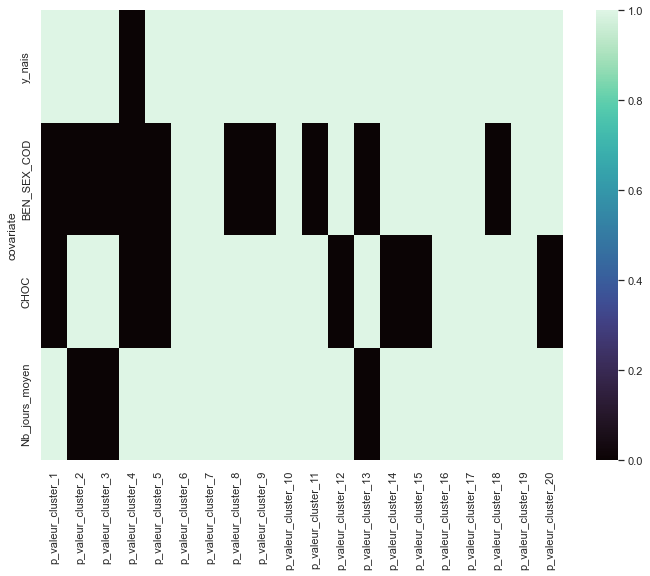

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("darkgrid")
sns.heatmap(P_value_seuil, cmap="mako")

### AIC

In [23]:
for counter, AIC in enumerate(Partial_AIC):
    print( "Cluster_" + str(counter+1 ) + "  Partial AIC : " + str(Partial_AIC[counter]))

Cluster_1  Partial AIC : 2862
Cluster_2  Partial AIC : 1627
Cluster_3  Partial AIC : 2481
Cluster_4  Partial AIC : 1602
Cluster_5  Partial AIC : 1395
Cluster_6  Partial AIC : 2852
Cluster_7  Partial AIC : 2293
Cluster_8  Partial AIC : 1263
Cluster_9  Partial AIC : 2382
Cluster_10  Partial AIC : 2606
Cluster_11  Partial AIC : 2379
Cluster_12  Partial AIC : 2394
Cluster_13  Partial AIC : 1902
Cluster_14  Partial AIC : 2011
Cluster_15  Partial AIC : 4237
Cluster_16  Partial AIC : 2331
Cluster_17  Partial AIC : 4231
Cluster_18  Partial AIC : 6035
Cluster_19  Partial AIC : 8868
Cluster_20  Partial AIC : 1493


### Concordance Index

In [24]:
for counter, AIC in enumerate(Liste_concordance_index):
    print( "Cluster_" + str(counter +1) + "  Concordance Index : " + str(Liste_concordance_index[counter]))

Cluster_1  Concordance Index : 0.634
Cluster_2  Concordance Index : 0.637
Cluster_3  Concordance Index : 0.617
Cluster_4  Concordance Index : 0.563
Cluster_5  Concordance Index : 0.64
Cluster_6  Concordance Index : 0.672
Cluster_7  Concordance Index : 0.719
Cluster_8  Concordance Index : 0.712
Cluster_9  Concordance Index : 0.659
Cluster_10  Concordance Index : 0.686
Cluster_11  Concordance Index : 0.631
Cluster_12  Concordance Index : 0.602
Cluster_13  Concordance Index : 0.636
Cluster_14  Concordance Index : 0.628
Cluster_15  Concordance Index : 0.589
Cluster_16  Concordance Index : 0.608
Cluster_17  Concordance Index : 0.612
Cluster_18  Concordance Index : 0.652
Cluster_19  Concordance Index : 0.611
Cluster_20  Concordance Index : 0.584


### Interval de confiance

In [25]:
Liste_interval

,Interval de confiance du coefficient cluster 1,Interval de confiance du coefficient cluster2,Interval de confiance du coefficient cluster3,Interval de confiance du coefficient cluster4,Interval de confiance du coefficient cluster5,Interval de confiance du coefficient cluster6,Interval de confiance du coefficient cluster7,Interval de confiance du coefficient cluster8,Interval de confiance du coefficient cluster9,Interval de confiance du coefficient cluster10,Interval de confiance du coefficient cluster11,Interval de confiance du coefficient cluster12,Interval de confiance du coefficient cluster13,Interval de confiance du coefficient cluster14,Interval de confiance du coefficient cluster15,Interval de confiance du coefficient cluster16,Interval de confiance du coefficient cluster17,Interval de confiance du coefficient cluster18,Interval de confiance du coefficient cluster19,Interval de confiance du coefficient cluster20
covariate,,,,,,,,,,,,,,,,,,,,
y_nais,"[0.03 ,0.05]","[0.04 ,0.07]","[0.03 ,0.05]","[-0.0 ,0.03]","[0.02 ,0.06]","[0.05 ,0.07]","[0.04 ,0.07]","[0.05 ,0.09]","[0.04 ,0.07]","[0.04 ,0.06]","[0.02 ,0.04]","[0.01 ,0.04]","[0.02 ,0.05]","[0.02 ,0.05]","[0.02 ,0.04]","[0.02 ,0.05]","[0.03 ,0.05]","[0.04 ,0.05]","[0.02 ,0.03]","[0.01 ,0.05]"
BEN_SEX_COD,"[-0.38 ,0.12]","[-0.61 ,0.07]","[-0.27 ,0.26]","[-0.55 ,0.07]","[-0.54 ,0.15]","[-0.63 ,-0.12]","[-0.68 ,-0.11]","[-0.58 ,0.14]","[-0.51 ,0.04]","[-0.66 ,-0.12]","[-0.33 ,0.2]","[-0.65 ,-0.1]","[-0.3 ,0.32]","[-0.62 ,-0.05]","[-0.55 ,-0.14]","[-0.57 ,-0.03]","[-0.46 ,-0.04]","[-0.24 ,0.12]","[-0.36 ,-0.05]","[-0.81 ,-0.12]"
CHOC,"[-0.1 ,0.95]","[0.57 ,2.64]","[0.3 ,1.44]","[-1.28 ,0.26]","[-0.57 ,1.48]","[0.3 ,1.43]","[0.68 ,1.94]","[0.29 ,1.77]","[1.19 ,2.4]","[0.18 ,1.35]","[0.05 ,1.4]","[-0.24 ,0.77]","[1.3 ,2.37]","[-1.49 ,2.51]","[-0.26 ,0.86]","[0.1 ,1.16]","[0.4 ,1.47]","[0.66 ,1.5]","[0.03 ,0.58]","[-0.62 ,1.19]"
Nb_jours_moyen,"[0.01 ,0.03]","[-0.0 ,0.04]","[-0.01 ,0.02]","[0.02 ,0.08]","[0.01 ,0.05]","[0.03 ,0.06]","[0.07 ,0.12]","[0.02 ,0.07]","[0.0 ,0.02]","[0.03 ,0.07]","[0.03 ,0.07]","[0.01 ,0.07]","[-0.06 ,0.01]","[0.03 ,0.07]","[0.02 ,0.05]","[0.02 ,0.06]","[0.03 ,0.07]","[0.02 ,0.05]","[0.05 ,0.1]","[0.01 ,0.08]"


### Ljung-Box

In [26]:
Liste_ljung_box

,P-valeur Ljung-Box cluster 1,P-valeur Ljung-Box cluster 2,P-valeur Ljung-Box cluster 3,P-valeur Ljung-Box cluster 4,P-valeur Ljung-Box cluster 5,P-valeur Ljung-Box cluster 6,P-valeur Ljung-Box cluster 7,P-valeur Ljung-Box cluster 8,P-valeur Ljung-Box cluster 9,P-valeur Ljung-Box cluster 10,P-valeur Ljung-Box cluster 11,P-valeur Ljung-Box cluster 12,P-valeur Ljung-Box cluster 13,P-valeur Ljung-Box cluster 14,P-valeur Ljung-Box cluster 15,P-valeur Ljung-Box cluster 16,P-valeur Ljung-Box cluster 17,P-valeur Ljung-Box cluster 18,P-valeur Ljung-Box cluster 19,P-valeur Ljung-Box cluster 20
covariate,,,,,,,,,,,,,,,,,,,,
y_nais,0.45,3.602142e-09,4.412623e-10,0.095366,7.240696e-07,5.233041e-17,1.104833e-12,2.532066e-11,5.033318e-14,1.407074e-17,0.000002,0.000198,1.231323e-06,2.969940e-08,1.651508e-07,5.645914e-08,5.135739e-10,2.218629e-26,4.514661e-13,0.00012
BEN_SEX_COD,0.88,1.147525e-01,9.715862e-01,0.123968,2.667404e-01,4.355323e-03,7.029048e-03,2.237938e-01,9.502404e-02,4.328149e-03,0.632464,0.007222,9.480529e-01,2.283252e-02,1.016197e-03,2.882740e-02,2.105756e-02,5.046446e-01,8.075892e-03,0.00819
CHOC,0.33,2.350733e-03,2.809931e-03,0.194987,3.888846e-01,2.650280e-03,4.491763e-05,6.209533e-03,6.794430e-09,1.021317e-02,0.033990,0.297589,2.403398e-11,6.182117e-01,2.979168e-01,1.898656e-02,5.776864e-04,4.386780e-07,2.881823e-02,0.54045
Nb_jours_moyen,0.00,1.100000e-01,0.000000e+00,0.360000,4.400000e-01,0.000000e+00,4.600000e-01,4.000000e-02,1.000000e+00,0.000000e+00,0.020000,0.220000,0.000000e+00,2.000000e-02,0.000000e+00,4.600000e-01,0.000000e+00,0.000000e+00,1.600000e-01,0.31000


In [27]:
Liste_ljung_box_seuil=Liste_ljung_box[Liste_ljung_box>=0.05] == Liste_ljung_box

In [28]:
Liste_ljung_box_seuil

,P-valeur Ljung-Box cluster 1,P-valeur Ljung-Box cluster 2,P-valeur Ljung-Box cluster 3,P-valeur Ljung-Box cluster 4,P-valeur Ljung-Box cluster 5,P-valeur Ljung-Box cluster 6,P-valeur Ljung-Box cluster 7,P-valeur Ljung-Box cluster 8,P-valeur Ljung-Box cluster 9,P-valeur Ljung-Box cluster 10,P-valeur Ljung-Box cluster 11,P-valeur Ljung-Box cluster 12,P-valeur Ljung-Box cluster 13,P-valeur Ljung-Box cluster 14,P-valeur Ljung-Box cluster 15,P-valeur Ljung-Box cluster 16,P-valeur Ljung-Box cluster 17,P-valeur Ljung-Box cluster 18,P-valeur Ljung-Box cluster 19,P-valeur Ljung-Box cluster 20
covariate,,,,,,,,,,,,,,,,,,,,
y_nais,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
BEN_SEX_COD,True,True,True,True,True,False,False,True,True,False,True,False,True,False,False,False,False,True,False,False
CHOC,True,False,False,True,True,False,False,False,False,False,False,True,False,True,True,False,False,False,False,True
Nb_jours_moyen,False,True,False,True,True,False,True,False,True,False,False,True,False,False,False,True,False,False,True,True


<AxesSubplot:ylabel='covariate'>

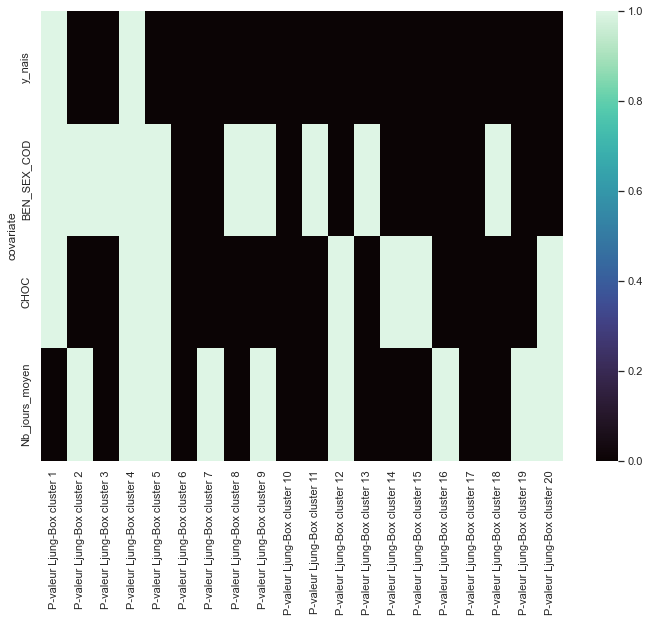

In [29]:
sns.heatmap(Liste_ljung_box_seuil, cmap="mako")

### Test des hasards proportionnels

In [30]:
Rank

,Statistique du test des hasards proportionnels (rank) cluster 1,p_valeur cluster 1,Statistique du test des hasards proportionnels (rank) cluster 2,p_valeur cluster 2,Statistique du test des hasards proportionnels (rank) cluster 3,p_valeur cluster 3,Statistique du test des hasards proportionnels (rank) cluster 4,p_valeur cluster 4,Statistique du test des hasards proportionnels (rank) cluster 5,p_valeur cluster 5,...,Statistique du test des hasards proportionnels (rank) cluster 16,p_valeur cluster 16,Statistique du test des hasards proportionnels (rank) cluster 17,p_valeur cluster 17,Statistique du test des hasards proportionnels (rank) cluster 18,p_valeur cluster 18,Statistique du test des hasards proportionnels (rank) cluster 19,p_valeur cluster 19,Statistique du test des hasards proportionnels (rank) cluster 20,p_valeur cluster 20
y_nais,7.322505,0.006810,1.153065,0.282908,2.702000,0.100222,3.967049,0.046399,5.156182,0.023164,...,10.493478,0.001198,9.494855,2.060489e-03,20.659090,5.487602e-06,0.211693,0.645444,1.678307,0.195150
BEN_SEX_COD,0.362331,0.547215,0.332611,0.564126,1.660396,0.197550,2.128086,0.144621,3.916204,0.047823,...,2.101862,0.147120,1.144212,2.847641e-01,2.374002,1.233704e-01,0.328657,0.566451,1.696757,0.192713
CHOC,1.841144,0.174817,1.886935,0.169548,6.322008,0.011925,0.407507,0.523238,5.013443,0.025151,...,2.131911,0.144261,16.325222,5.334913e-05,7.632270,5.733311e-03,0.717093,0.397099,2.992234,0.083665
Nb_jours_moyen,10.965014,0.000928,1.799764,0.179741,1.199623,0.273397,4.346870,0.037077,3.624888,0.056921,...,2.473608,0.115772,29.960366,4.409681e-08,29.912033,4.520984e-08,5.818373,0.015860,4.683751,0.030449


In [31]:
Rank_seuil=Rank.copy()
for i in range (1,21):
    Rank_seuil=Rank_seuil.drop(["Statistique du test des hasards proportionnels  (rank) cluster " + str(i)], axis=1)
Rank_seuil=Rank_seuil[Rank_seuil>=0.05]==Rank_seuil
Rank_seuil

,p_valeur cluster 1,p_valeur cluster 2,p_valeur cluster 3,p_valeur cluster 4,p_valeur cluster 5,p_valeur cluster 6,p_valeur cluster 7,p_valeur cluster 8,p_valeur cluster 9,p_valeur cluster 10,p_valeur cluster 11,p_valeur cluster 12,p_valeur cluster 13,p_valeur cluster 14,p_valeur cluster 15,p_valeur cluster 16,p_valeur cluster 17,p_valeur cluster 18,p_valeur cluster 19,p_valeur cluster 20
y_nais,False,True,True,False,False,True,True,True,False,False,False,True,True,True,False,False,False,False,True,True
BEN_SEX_COD,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
CHOC,True,True,False,True,False,True,True,False,True,True,True,True,True,True,True,True,False,False,True,True
Nb_jours_moyen,False,True,True,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False


<AxesSubplot:>

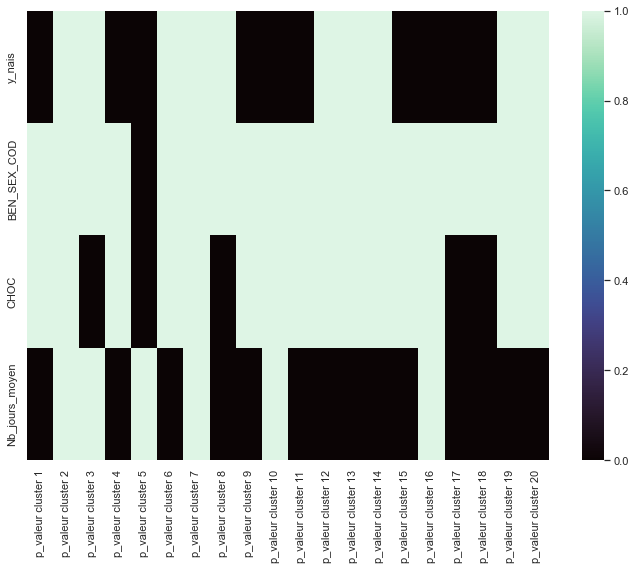

In [32]:
sns.heatmap(Rank_seuil, cmap="mako")

In [33]:
KM

,Statistique du test des hasards proportionnels (km) cluster 1,p_valeur cluster 1,Statistique du test des hasards proportionnels (km) cluster 2,p_valeur cluster 2,Statistique du test des hasards proportionnels (km) cluster 3,p_valeur cluster 3,Statistique du test des hasards proportionnels (km) cluster 4,p_valeur cluster 4,Statistique du test des hasards proportionnels (km) cluster 5,p_valeur cluster 5,...,Statistique du test des hasards proportionnels (km) cluster 16,p_valeur cluster 16,Statistique du test des hasards proportionnels (km) cluster 17,p_valeur cluster 17,Statistique du test des hasards proportionnels (km) cluster 18,p_valeur cluster 18,Statistique du test des hasards proportionnels (km) cluster 19,p_valeur cluster 19,Statistique du test des hasards proportionnels (km) cluster 20,p_valeur cluster 20
y_nais,7.325075,0.006800,1.139704,0.285715,2.622752,0.105342,3.769986,0.052180,4.481955,0.034255,...,10.304664,0.001327,9.936405,1.620417e-03,20.734839,5.274754e-06,0.043720,0.834376,1.747963,0.186133
BEN_SEX_COD,0.341744,0.558824,0.371822,0.542013,1.506543,0.219667,1.877113,0.170663,3.926240,0.047538,...,2.075512,0.149680,0.843940,3.582725e-01,2.243412,1.341846e-01,0.229772,0.631693,1.707457,0.191316
CHOC,1.691993,0.193339,1.716776,0.190109,6.241067,0.012482,0.418195,0.517839,5.011441,0.025180,...,1.911197,0.166830,15.951051,6.500169e-05,7.482634,6.229686e-03,0.520081,0.470807,2.888675,0.089204
Nb_jours_moyen,10.428810,0.001241,1.759669,0.184666,1.145371,0.284520,4.130563,0.042115,3.203437,0.073484,...,2.141117,0.143397,27.846370,1.313403e-07,28.339497,1.017976e-07,4.957907,0.025972,4.452088,0.034859


In [34]:
KM_seuil=KM.copy()
for i in range (1,21):
    KM_seuil=KM_seuil.drop(["Statistique du test des hasards proportionnels  (km) cluster " + str(i)], axis=1)
KM_seuil=KM_seuil[KM_seuil>=0.05]==KM_seuil
KM_seuil

,p_valeur cluster 1,p_valeur cluster 2,p_valeur cluster 3,p_valeur cluster 4,p_valeur cluster 5,p_valeur cluster 6,p_valeur cluster 7,p_valeur cluster 8,p_valeur cluster 9,p_valeur cluster 10,p_valeur cluster 11,p_valeur cluster 12,p_valeur cluster 13,p_valeur cluster 14,p_valeur cluster 15,p_valeur cluster 16,p_valeur cluster 17,p_valeur cluster 18,p_valeur cluster 19,p_valeur cluster 20
y_nais,False,True,True,True,False,True,True,True,True,False,False,True,True,True,False,False,False,False,True,True
BEN_SEX_COD,True,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True
CHOC,True,True,False,True,False,True,True,False,True,True,True,True,True,True,True,True,False,False,True,True
Nb_jours_moyen,False,True,True,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False


<AxesSubplot:>

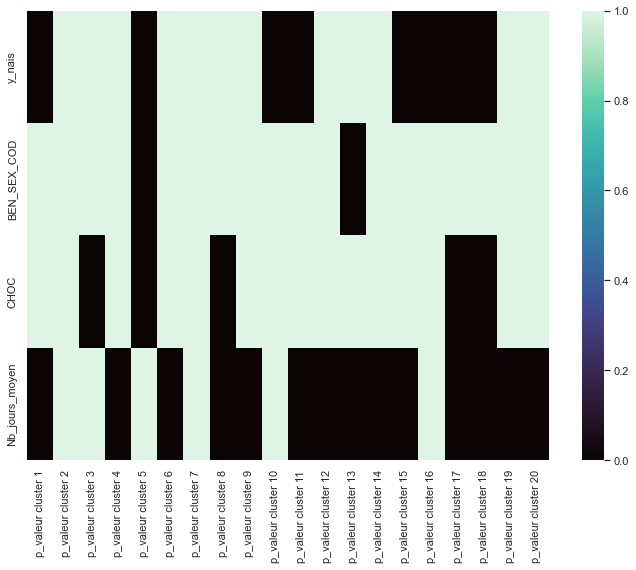

In [35]:
sns.heatmap(KM_seuil, cmap="mako")